In [135]:
import numpy as np
from matplotlib import pyplot as plt 

In [136]:
N=20
a=0.5
eps=1.4
N_cor=20
N_cf=1000
E_0 = 0.5
E_1 = 1.5

In [137]:
def S(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1)%N # previous site
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

def update(x):
    for j in range(0,N):
        old_x = x[j] # save original value
        old_Sj = S(j,x)
        x[j] = x[j] + np.random.uniform(-eps,eps) # update x[j]
        dS = S(j,x) - old_Sj # change in action
        if dS>0 and np.exp(-dS)<np.random.uniform(0,1):
            x[j] = old_x # restore old value

In [138]:
def matrix_G(gamma):                            #matrix N*N_cf
    matrix_g = np.zeros ((N_cf,N))                                      
    x = np.zeros(N)               
    for j in range(0,N): 
        x[j] = 0                               
    for j in range(0,10*N_cor):                 #termalisation
        update(x)
    for rows in range(0,N_cf):                     
        for j in range(0,N_cor):                #discard N_cor values
            update(x)
        for n in range(0,N):                    
            matrix_g [rows][n] = gamma(x,n)     #for every time you have N_cf values of G
    return matrix_g

def average_G(matrix_g):
    average_G = np.zeros(N)
    for n in range (0,N):
        for rows in range(0,N_cf):
            average_G [n] = average_G [n] + matrix_g[rows][n]
        average_G[n] = average_G[n]/N_cf
    return average_G

def std_G(matrix_g):
    std_G =np.zeros(N)
    for n in range (0,N):
        for rows in range(0,N_cf):
            std_G [n] = std_G [n] + (average_G[n] - matrix_g[rows][n])**2
        std_G[n] = np.sqrt( std_G[n])
    return std_G

In [139]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [140]:
matrix_g = matrix_G(compute_G)

def delta_E(delta_E):
    delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        delta_E[n] = np.log(np.abs(average_G(matrix_g)[n]/average_G(matrix_g)[n+1]))
    return delta_E

def error_delta_E(error_delta_E):
    error_delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        error_delta_E[n] = np.sqrt(((np.std(average_G(matrix_g)) / average_G(matrix_g)[n])**2 + 
                                   (np.std(average_G(matrix_g))/ average_G(matrix_g)[n+1])**2)) #propagation of error
    return error_delta_E

In [141]:
def t(t):
    t = np.zeros(N-1)
    for n in range (0,N-1):
        t[n]=n*a
    return t

def E_exact(E_1,E_0,E_exact):
    E_exact = np.zeros(N-1)
    for n in range (0, N-1):
        E_exact[n] = a*(E_1-E_0)
    return E_exact

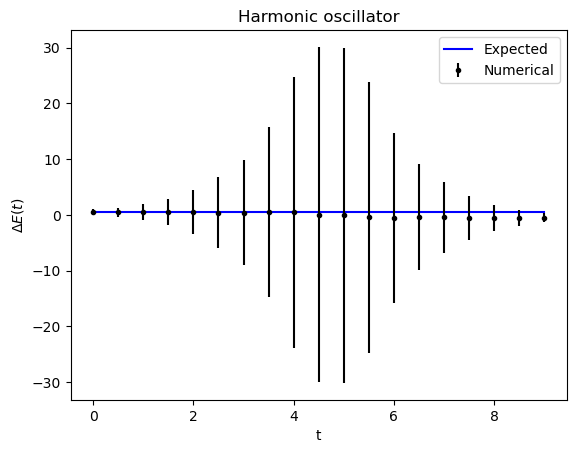

In [142]:
#plt.plot(t(np.zeros(N)),  average_G(matrix_g) ,'b',label='G')
#plt.errorbar(t(np.zeros(N)), average_G(matrix_g), yerr=std_G(matrix_g), fmt='.', color='black', label='Numerical')
plt.plot(t(np.zeros(N-1)),  E_exact(E_1,E_0, np.zeros(N-1)) ,'b',label='Expected')
plt.errorbar(t(np.zeros(N-1)), delta_E(np.zeros(N-1)), yerr=error_delta_E(np.zeros(N-1)), fmt='.', color='black', label='Numerical')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()